# KELVIN-HELMHOTZ INSTABILITY

In [50]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.constants import pi, c, hbar, epsilon_0, e, m_e, m_p, N_A, k
import cmath
import os 
import re
from scipy.optimize import curve_fit
from IPython.display import Image

from fig_config import (
    add_grid,
    figure_features,
)  # <--- import customized functions

figure_features()



In hydrodynamics the KHI for a (continuous) vortex sheet (i.e. a tangential discontinuity between two parallel flows $v_1$ and $v_2$) in an incompressible inviscid fluid of constant density and without gravity is known to have a dispersion relation of the form

$$\omega (k_H)= \frac{v_1+v_2}{2}k_H \pm i \frac{v_1-v_2}{2}k_H$$

where $k_H$ is the wavevector of the perturbation along the discontinuity, i.e. parallel to the flows. This result is modified if, instead of a tangential discontinuity, a finite-width shear layer is present; for example, for a piecewise continuous profile that is constant for $\vert y \vert > \delta$ and changes linearly for $-\delta\leq y \leq \delta$ the dispersion relation becomes

$$\omega_{KH} (k_H) = \frac{v_1+v_2}{2} k_H \pm i \frac{v_1-v_2}{4 \delta} \sqrt{e^{-4 k_H \delta} - (2k_h\delta-1)^2}$$

At low wavenumbers kH the instability rate increases linearly, as in the zero-thickness case (12), while at higher transverse wavenumbers there is a decrease and above $k_H \delta \sim 0.6 $ the instability is quenched.

So, we will plot this for our cases. In our case $v_1=-v_2= \frac{\Delta v}{2}$

In [51]:
def im_omega(deltav,k):
    return deltav*k/2 

def im_omega_kh(delta, kx):
    return  1/(2*delta) * np.sqrt (np.exp(-4 * kx * delta ) - (2 * kx * delta - 1)**2) 

def im_omega(k):
    vec = np.array([])
    for kx in k:
        vec =np.append(vec, 1/2 * np.sqrt(np.exp(-4 * kx) - (2 * kx - 1)**2) )
    return  vec

def delta(xi,c_s,delta_v):
    return xi * (1 + c_s / delta_v)


## Dispersion relation from Hydrodynamic instabilites

So, now we will try to plot **Figure 4.11** from the book *Hydrodynamic instabilities - F.Charru* 

/var/folders/bj/ch6vb_9j551gr6pn5t7t2c0w0000gn/T/ipykernel_1399/1870395876.py:10: RuntimeWarning: invalid value encountered in sqrt
  vec =np.append(vec, 1/2 * np.sqrt(np.exp(-4 * kx) - (2 * kx - 1)**2) )


Text(0, 0.5, '$\\frac{\\omega_i \\delta} {\\Delta U}$')

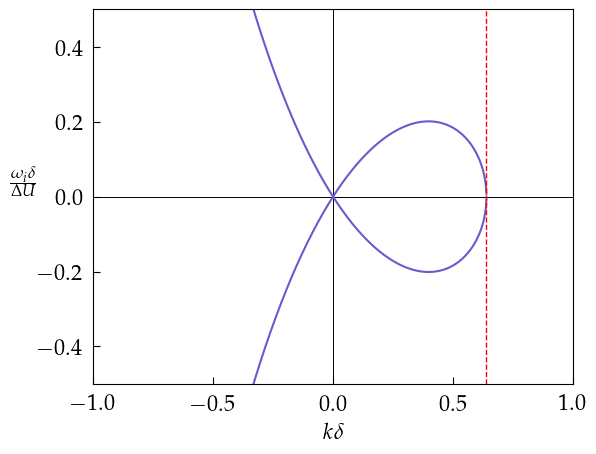

In [52]:


k_h = np.linspace(-10, 10, 10000)

a_mu = sc.physical_constants['atomic mass constant'][0]
m = 12 * a_mu
v_lab= 0.2771e-8

delta = 3

plt.axhline(y=0, color='k', linestyle='-', linewidth = 0.7)
plt.axvline(x=0, color='k', linestyle='-', linewidth = 0.7)

plt.plot(k_h, im_omega(k_h), linewidth = 1.5,  c = 'slateblue')
plt.plot(k_h, -im_omega(k_h), linewidth = 1.5,  c = 'slateblue')


plt.axvline(x = 0.6392  , color='r', linestyle='--', linewidth = 1)
#plt.axvline(x = 0.6392/delta  , color='r', linestyle='--', linewidth = 1)

plt.xlabel('$k \delta$')
plt.xlim(-1,1)
plt.ylim(-0.5,0.5)
plt.ylabel(r'$\frac{\omega_i \delta} {\Delta U}$' , labelpad = 10 , rotation = 0)

Here, we see the temporal growth rate of the unstable modes. The red dotted line represents the place in the space where the dispersion relation becomes stable.

## Dispersion relation from Giacomelli - Carusotto

Now, we will try to achieve the **Figure 2** in *Interplay of Kelvin-Helmholtz and superradiant instabilities of an array of quantized vortices in a
two-dimensional Bose-Einstein condensate - L. Giacomelli and I. Carusotto*

First, we will plot the dispersion relation for $\delta = 0.0983$. This is the $\delta$ we should have in order to be able to plot the dispersion relation in all our graph? 

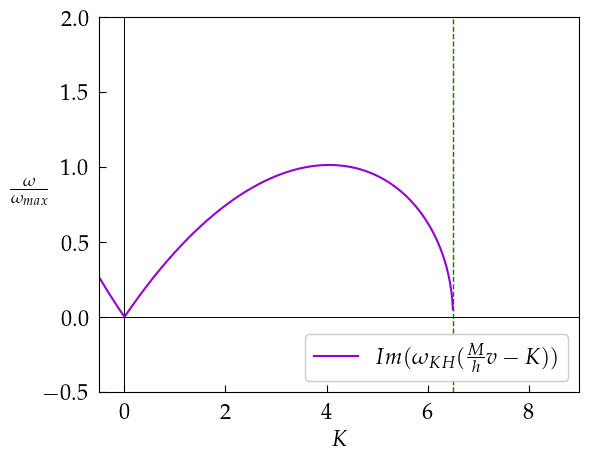

In [53]:
v_lab= 0.2271e-8

delta = 0.0983

x_0 = 0.6392/delta

x_0_2 = m * v_lab / hbar - x_0

k_h = np.linspace(-6.5, 6.5, 10000)

k_h2 = m * v_lab / hbar - k_h

k_h_aux = np.linspace(x_0+0.01, 0.4, 10000)

#We will define the maximum cvalue of the function in order to have it normalized.
a_max =v_lab / 2 * im_omega_kh(delta, 4.5)

plt.axvline(x =   x_0 , color='g', linestyle='--', linewidth = 1)
plt.axhline(y=0, color='k', linestyle='-', linewidth = 0.7)
plt.axvline(x=0, color='k', linestyle='-', linewidth = 0.7)

plt.plot(k_h, v_lab/(2 * a_max) * im_omega_kh(delta,k_h), linewidth = 1.5,  c = 'darkviolet', ls= '-', label = r'$Im(\omega_{KH}(\frac{M}{h}v - K ))$')

plt.xlim(-0.5,9)
plt.ylim(-0.5,2)
plt.xlabel('$K$')
plt.ylabel(r'$\frac{\omega}{\omega_{max}}$', labelpad = 10 , rotation = 0)
plt.legend(loc = 'lower right')

In the graph, the green dotted line represents the place where the dispersion relation posseses two real roots and thus, the perturbation is neither amplifiied nor attenuated

Now, we will make the change of variable they make in the paper. In this case we will be having

$$k_H= \frac{M}{\hbar}v - K$$

The $\delta$ we will be using will be the one we obtain from the fit below. 

/var/folders/bj/ch6vb_9j551gr6pn5t7t2c0w0000gn/T/ipykernel_1399/1870395876.py:5: RuntimeWarning: invalid value encountered in sqrt
  return  1/(2*delta) * np.sqrt (np.exp(-4 * kx * delta ) - (2 * kx * delta - 1)**2)


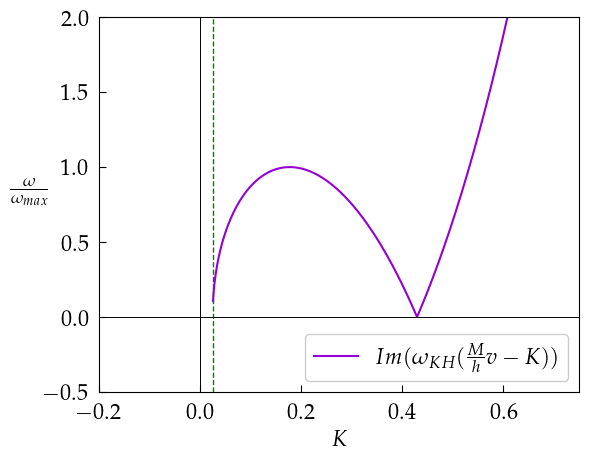

In [63]:
v_lab= 0.2271e-8

delta = 1.58

x_0 = 0.6392/delta

x_0_2 = m * v_lab / hbar - x_0

k_h = np.linspace(-6.5, 6.5, 10000)

k_h2 = m * v_lab / hbar - k_h

k_h_aux = np.linspace(x_0+0.01, 0.4, 10000)

#We will define the maximum cvalue of the function in order to have it normalized.
a_max =v_lab / 2 * im_omega_kh(delta, m * v_lab / hbar - 0.17)

plt.axvline(x =   x_0_2 , color='g', linestyle='--', linewidth = 1)
plt.axhline(y=0, color='k', linestyle='-', linewidth = 0.7)
plt.axvline(x=0, color='k', linestyle='-', linewidth = 0.7)

plt.plot(k_h, v_lab/(2 * a_max) * im_omega_kh(delta, m * v_lab / hbar - k_h), linewidth = 1.5,  c = 'darkviolet', ls= '-', label = r'$Im(\omega_{KH}(\frac{M}{h}v - K ))$')

plt.xlim(-0.20,0.75)
plt.ylim(-0.5,2)
plt.xlabel('$K$')
plt.ylabel(r'$\frac{\omega}{\omega_{max}}$', labelpad = 10 , rotation = 0)
plt.legend(loc = 'lower right')

They green dotted line represents the place in the space where the modes become stable. 

*L. Giacomelli and G. Carusotto* state that they added an **aditional shift in wavenumber** to improve the similarity between the two results. So, the shift in wavenumber will be added arbitrarily in order to be able to reproduce their figure,

/var/folders/bj/ch6vb_9j551gr6pn5t7t2c0w0000gn/T/ipykernel_1399/1870395876.py:5: RuntimeWarning: invalid value encountered in sqrt
  return  1/(2*delta) * np.sqrt (np.exp(-4 * kx * delta ) - (2 * kx * delta - 1)**2)


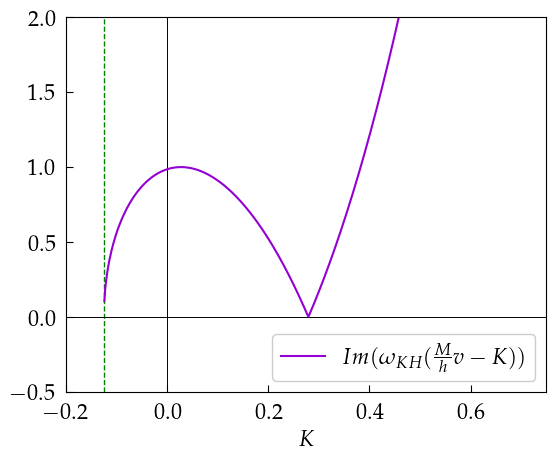

In [64]:
x_shift = 0.15

plt.axvline(x =   x_0_2 -x_shift , color='g', linestyle='--', linewidth = 1)
plt.axhline(y=0, color='k', linestyle='-', linewidth = 0.7)
plt.axvline(x=0, color='k', linestyle='-', linewidth = 0.7)


plt.plot(k_h-x_shift, v_lab/(2 * a_max) * im_omega_kh(delta, k_h2), linewidth = 1.5,  c = 'darkviolet', ls= '-', label = r'$Im(\omega_{KH}(\frac{M}{h}v - K ))$')

plt.xlim(-0.20,0.75)
plt.ylim(-0.5,2)
plt.xlabel('$K$')

plt.legend(loc = 'lower right')

In [65]:
cwd = os.getcwd()

print(cwd)

os.chdir("/Users/andonizaballa/Desktop/ANDONI/UNIBERTSITATEA/MASTER/MASTHER'S THESIS/CODE")

/Users/andonizaballa/Desktop/ANDONI/UNIBERTSITATEA/MASTER/MASTHER'S THESIS/CODE


## $\delta$ fit

Now, we will fit the delta to check what value we obtain. The velocity profile can be approximated by means of the following function.

$$v_x(y)= \frac{\Delta v}{2} \tanh \left( \frac{y}{\delta}\right)$$

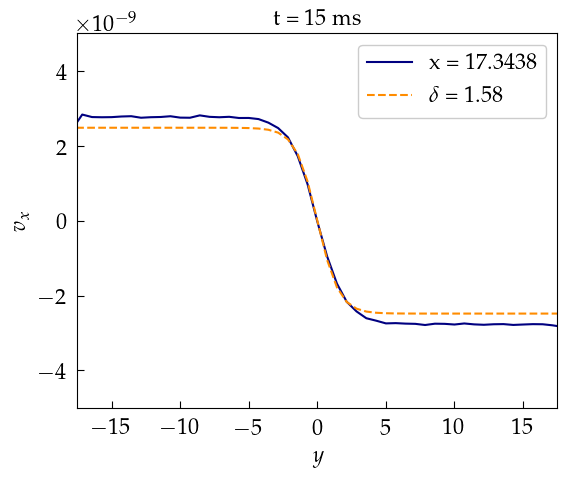

In [70]:
def tanh_vel(x,deltav,delta):
    return deltav / 2.0 * np.tanh(x / delta)

def plot_velocity_profile(xprof,file):

 

    os.chdir('data')

    os.chdir('vel2')

    figure_features()

    x , y , vx , vy  = np.loadtxt(file, unpack=True)

    time = extract_number(file)

    #print(time)

    # We want to plot y versus vx for a given value of x 

    for xnum in x:
        # Get the index of the x value
        
        if xnum == xprof :
            index = np.where(x == xnum)
            xlabel = xnum

    popt , pcov = curve_fit(tanh_vel, y[index], vx[index])
            
    plt.plot(y[index], vx[index], label = 'x = ' + str(xlabel), lw = 1.5 , c = 'navy')
    plt.plot(y[index], tanh_vel(y[index],popt[0],popt[1]), '--', label = '$\delta$ = $%.2f$' % popt[1], lw = 1.5 , c = 'darkorange')

    plt.ylabel('$v_x$')
    plt.xlabel('$ y $')
    plt.title('t = ' + str(time)+ ' ms')
    plt.legend()
    plt.xlim(-17.5,17.5)
    plt.ylim(-0.5E-8,0.5E-8)
    #plt.title('Velocity in x direction vs y')

    os.chdir('../..')

    return popt

def extract_number(filename):
    # Regular expression to match the numerical part of the file name
    match = re.search(r'-([0-9]+)', filename)

    
    if match:
        return (-1)*int(match.group())
    else:
        return -1  # Return -1 if no number found
    
delta_fit = plot_velocity_profile(17.3438,'vel2-015.dat')
  

## Obatined graph

The graph of the fitted exponents agains $k_x$ takes this from. The purple line is the obtained dispersion relation. However, the $\delta$ is fixed is completely different to the one we should have in order to be able to see the dispersion relation. 

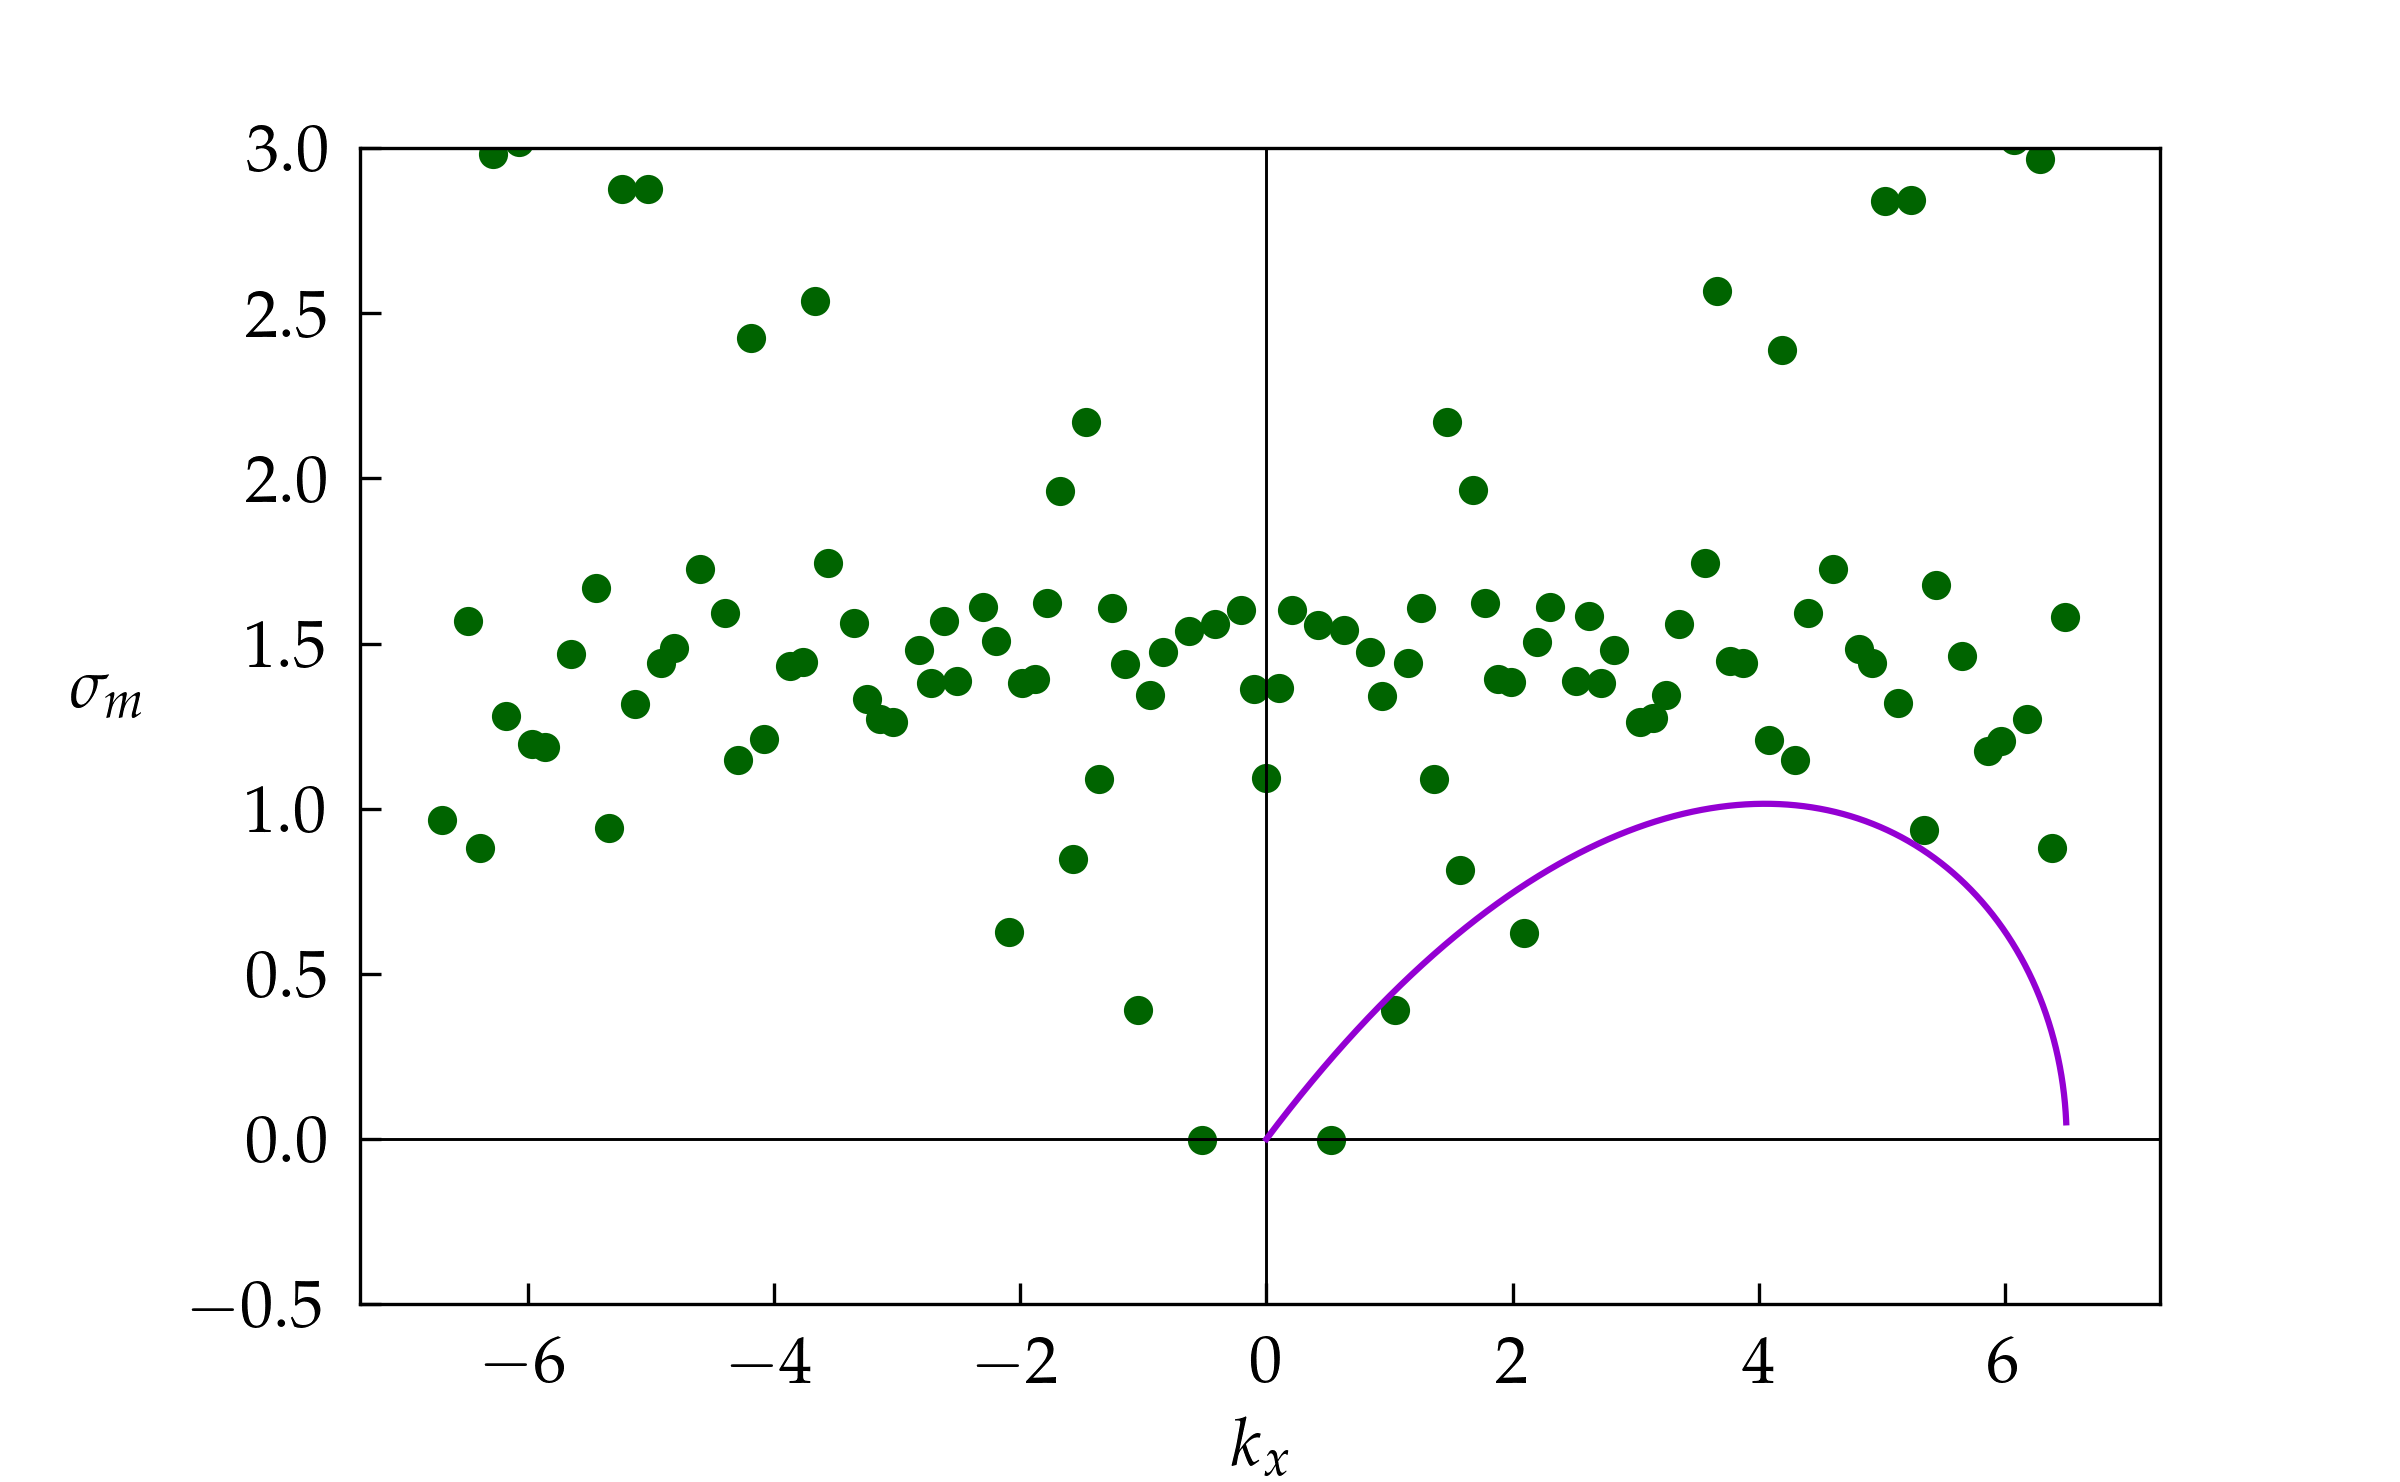

In [71]:
Image(filename='data/fit.png')


## Things to take into account or to fix


* The Figure we see in **Giacomelli** is the one after the change of variable they make and an "arbitrary"? phase shift in order to comply with their results
* The change of variable they make is to displace our k moments from the k momenta of the constants velocity $p= \hbar k \to k = \frac{p}{\hbar}=\frac{m v}{\hbar}$
* The Delta we must use is $\delta \sim 1.5$. However, do they use that $\delta$ in the papers? It is clear that with that delta the system becomes stable for $k < \frac{0.6392}{\delta}$ which in this case lies in $k = 0.4233$
* Maybe, in order to be able to see this behaviour we should make the simulations again and focus in the zone where $0< k < 0.4233$ ? 
* Fitting the exponential growth of each mode should give us something similar to the dispersion relation we have in the previous figure. However, even giving a glance to the graphs we see that this will not happen, cause the behaviour of the exponents of the fit does not behave as we should expect. In **Giacomelli** they plot the growth rate agains $k \xi$. Maybe that is why they avoid the problem.
* Looking at **Nature's** paper we can dilucidate what $\delta$ they are using. We see that the place where the modes becomes stable lies at $x_{max}=0.8$. So,
$$x_{max}=\frac{m_{max}}{\Delta w}=\frac{k_{max}R_0}{\Delta w}=\frac{R_0}{\Delta w} \frac{0.6392}{\delta} \to \delta = \frac{R_0}{\Delta w}\frac{0.6392}{x_{max}} \sim 1.8 $$